## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.preprocessing import StandardScaler

import timeit


In [104]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [105]:
heart.shape

(4238, 16)

In [106]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [107]:
# answer below:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [108]:
heart.dropna(inplace=True)

Then, we split the data into train and test with 20% of the data in the test subset.

In [109]:
# answer below:
X = heart.drop('TenYearCHD', 1)
y = heart.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We will then scale the data using the standard scaler. Do this in the cell below.

In [110]:
# answer below:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Generate a polynomial SVC model and a RBF SVC model. Compare the performance, and the runtime, for the two models.

In [111]:
def get_scores(model, X_train, X_test, y_train, y_test, verbose=False):
  if verbose:
    print(f'Training Scores: {model.score(X_train, y_train)}')
    print(f'Test Scores: {model.score(X_test, y_test)}')
  return model.score(X_train, y_train), model.score(X_test, y_test)

In [112]:
# answer below:

start = timeit.default_timer()

poly_svm = SVC(kernel='poly')
poly_svm.fit(X_train_scaled, y_train)

stop = timeit.default_timer()

print('Time: ', stop - start) 

Time:  0.3143764860005831


In [113]:
get_scores(poly_svm, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.8714090287277702
Test Scores: 0.8415300546448088


(0.8714090287277702, 0.8415300546448088)

In [114]:
start = timeit.default_timer()

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)

stop = timeit.default_timer()

print('Time: ', stop - start) 

Time:  0.31597196300026553


In [115]:
get_scores(svm, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.8611491108071135
Test Scores: 0.8387978142076503


(0.8611491108071135, 0.8387978142076503)

In [116]:
start = timeit.default_timer()

lin_svm = SVC(kernel='linear', C=0.1)
lin_svm.fit(X_train_scaled, y_train)

stop = timeit.default_timer()

print('Time: ', stop - start) 

Time:  0.06925563799995871


In [117]:
get_scores(lin_svm, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.8495212038303693
Test Scores: 0.8401639344262295


(0.8495212038303693, 0.8401639344262295)

In [118]:
C_list = np.logspace(-3, 0, 4)
best_svm = SVC()
params = {'kernel': ['poly', 'rbf', 'linear'], 'C': C_list, 'gamma': ['scale', 'auto'], 'class_weight':['balanced']}

best_svm_grid = GridSearchCV(best_svm, param_grid=params, cv=5)

best_svm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'class_weight': ['balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
best_svm_grid.best_estimator_

SVC(C=0.001, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [120]:
get_scores(best_svm_grid, X_train_scaled, X_test_scaled, y_train, y_test, verbose=True)

Training Scores: 0.8467852257181943
Test Scores: 0.8333333333333334


(0.8467852257181943, 0.8333333333333334)

Which model overfits more? How would you improve the overfitting?

Look at a classification report and confusion matrix. How does the class balance affect your results?

In [121]:
y_pred_train_poly = poly_svm.predict(X_train_scaled)
y_pred_test_poly = poly_svm.predict(X_test_scaled)

In [122]:
print(classification_report(y_train, y_pred_train_poly))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2484
           1       1.00      0.15      0.25       440

    accuracy                           0.87      2924
   macro avg       0.93      0.57      0.59      2924
weighted avg       0.89      0.87      0.83      2924



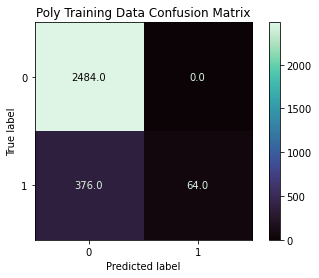

In [123]:
plot_confusion_matrix(poly_svm, X_train_scaled, y_train, cmap='mako', values_format='.1f')
plt.title('Poly Training Data Confusion Matrix')
plt.show()

In [124]:
y_pred_train = svm.predict(X_train_scaled)
y_pred_test = svm.predict(X_test_scaled)

In [125]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2484
           1       1.00      0.08      0.14       440

    accuracy                           0.86      2924
   macro avg       0.93      0.54      0.53      2924
weighted avg       0.88      0.86      0.81      2924



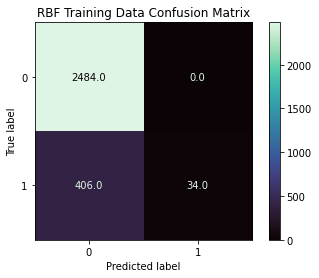

In [126]:
plot_confusion_matrix(svm, X_train_scaled, y_train, cmap='mako', values_format='.1f')
plt.title('RBF Training Data Confusion Matrix')
plt.show()

In [127]:
y_pred_train_best = best_svm_grid.predict(X_train_scaled)
y_pred_test_best = best_svm_grid.predict(X_test_scaled)

In [128]:
print(classification_report(y_train, y_pred_train_best))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2484
           1       0.46      0.10      0.16       440

    accuracy                           0.85      2924
   macro avg       0.66      0.54      0.54      2924
weighted avg       0.80      0.85      0.80      2924



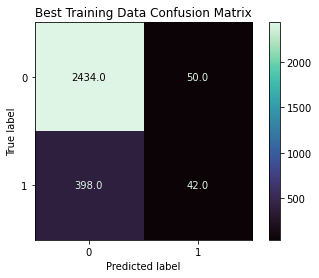

In [129]:
plot_confusion_matrix(best_svm_grid, X_train_scaled, y_train, cmap='mako', values_format='.1f')
plt.title('Best Training Data Confusion Matrix')
plt.show()